<a href="https://colab.research.google.com/github/MITXy/Machine-Learning-Models/blob/main/LinearRegressionModels/Linear_Regression_and_Model_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

In [8]:
url='https://drive.google.com/file/d/1kcWZPc6ovg_nI98nxziv1S_iVV00Krsk/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
tip = pd.read_csv(url)

In [10]:
tip.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6


In [12]:
tip.shape

(744, 7)

In [16]:
ProfileReport(tip)

TypeError: ignored

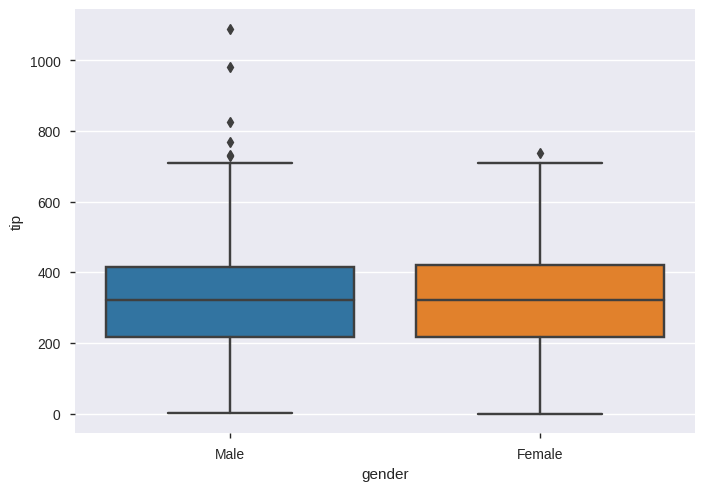

In [17]:
sns.boxplot(x="gender", y="tip", data = tip)

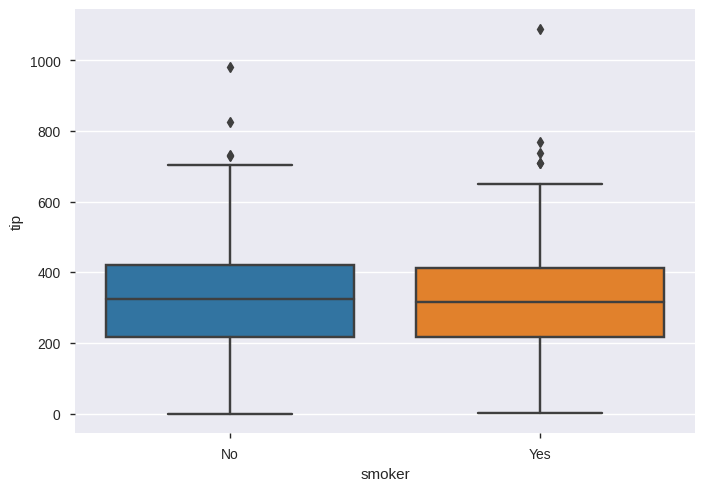

In [18]:
sns.boxplot(x="smoker", y="tip", data = tip)

In [19]:
tip.describe()

,total_bill,tip,size
count,744.000000,744.000000,744.000000
mean,2165.006640,325.948091,3.180108
std,954.248806,148.778225,1.532890
min,44.690000,0.000000,1.000000
25%,1499.022500,218.000000,2.000000
50%,2102.610000,320.460000,3.000000
75%,2743.802500,415.562500,4.000000
max,5538.290000,1090.000000,6.000000


Text(0, 0.5, 'Amount of Tips')

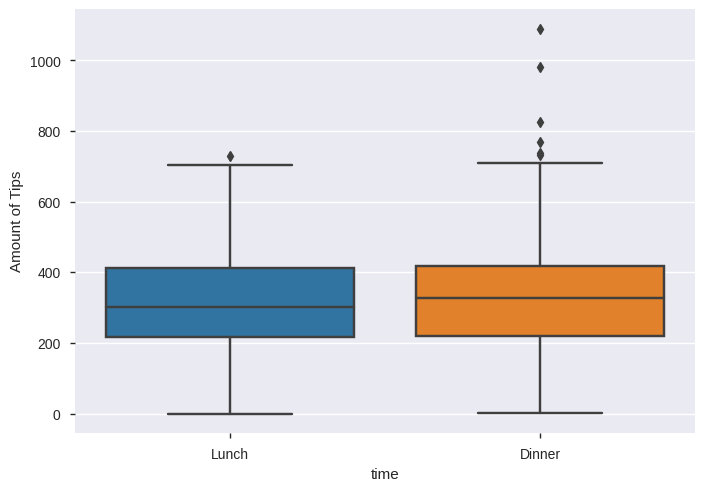

In [20]:
sns.boxplot(x="time", y="tip", data = tip)
plt.ylabel("Amount of Tips")

In [21]:
#To split the features from dependent and independent parameter
X = tip.drop(["tip"], axis = "columns")
y =tip["tip"]

In [22]:
y.head(7)

0    360.79
1    259.42
2    274.68
3    337.90
4    567.89
5    296.48
6    374.96
Name: tip, dtype: float64

In [23]:
X.head()

,total_bill,gender,smoker,day,time,size
0,2125.50,Male,No,Thur,Lunch,1
1,2727.18,Female,No,Sun,Dinner,5
2,1066.02,Female,Yes,Thur,Dinner,4
3,3493.45,Female,No,Sun,Dinner,1
4,3470.56,Male,Yes,Sun,Lunch,6


In [26]:
#one hot encoding converting the code to what the systems understands
x = pd.get_dummies(X)
x.head()

,total_bill,size,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tues,day_Wed,time_Dinner,time_Lunch
0,2125.50,1,0,1,1,0,0,0,0,0,1,0,0,0,1
1,2727.18,5,1,0,1,0,0,0,0,1,0,0,0,1,0
2,1066.02,4,1,0,0,1,0,0,0,0,1,0,0,1,0
3,3493.45,1,1,0,1,0,0,0,0,1,0,0,0,1,0
4,3470.56,6,0,1,0,1,0,0,0,1,0,0,0,0,1


In [27]:
X.head()

,total_bill,gender,smoker,day,time,size
0,2125.50,Male,No,Thur,Lunch,1
1,2727.18,Female,No,Sun,Dinner,5
2,1066.02,Female,Yes,Thur,Dinner,4
3,3493.45,Female,No,Sun,Dinner,1
4,3470.56,Male,Yes,Sun,Lunch,6


In [28]:
x.shape

(744, 15)

In [29]:
#solving the model using linear regression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
predictions[:20]

array([290.26334952, 358.33084735, 307.53833356, 372.20644316,
       261.59819814, 331.29716962, 280.98573611, 357.19295063,
       393.1897061 , 295.30471329, 335.46466966, 274.11779966,
       287.39811416, 268.25982737, 289.52215503, 366.51617941,
       227.05311   , 286.99809805, 351.53484013, 318.50264697])

In [35]:
comparison = pd.DataFrame({'Actual Values':y_test, 'Predictions': predictions})

In [36]:
comparison.shape

(149, 2)

In [37]:
comparison.head()

,Actual Values,Predictions
609,436.00,290.263350
539,545.00,358.330847
694,436.00,307.538334
350,378.23,372.206443
174,289.94,261.598198


In [38]:
#Error
y_test - predictions

609    145.736650
539    186.669153
694    128.461666
350      6.023557
174     28.341802
          ...    
404     81.174021
69     109.043725
712    556.785369
131    -59.874497
44    -170.429455
Name: tip, Length: 149, dtype: float64

In [39]:
mse = metrics.mean_squared_error(y_test, predictions)
print("Mean Squared Error:", round(mse,3))

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", round(rmse,3))

Mean Squared Error: 26860.903
Root Mean Squared Error: 163.893


In [41]:
print("Maximum tip:", np.max(tip["tip"]))
print("Minimum tip:", np.min(tip["tip"]))

Maximum tip: 1090.0
Minimum tip: 0.0


In [42]:
from sklearn.metrics import f1_score
print(f1_score(y_test, predictions))

ValueError: ignored